In [1]:
from readData import *
from Visualization import *
from FedAvg_CNN import iid_train_loader, noniid_train_loader
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# namelist = ["IID, C = 0.1, K = 100, E = 1",#0-#3. G1-G4
#             "IID, C = 0.2, K = 100, E = 1",
#             "IID, C = 0.5, K = 100, E = 1",
#             "IID, C = 1, K = 100, E = 1",

#             "IID, C = 0.1, K = 100, E = 10",#4-#7, G5-G8
#             "IID, C = 0.2, K = 100, E = 10",
#             "IID, C = 0.5, K = 100, E = 10",
#             "IID, C = 1, K = 100, E = 10", 

#             "IID, C = 0.1, K = 100, E = 20",#8-#11, G9-G12
#             "IID, C = 0.2, K = 100, E = 20",
#             "IID, C = 0.5, K = 100, E = 20",
#             "IID, C = 1, K = 100, E = 20",

#             "non-IID, C = 0.1, K = 100, E = 1", #16-#19, G17-G20
#             "non-IID, C = 0.2, K = 100, E = 1", 
#             "non-IID, C = 0.5, K = 100, E = 1", 
#             "non-IID, C = 1, K = 100, E = 1", 

#             "non-IID, C = 0.1, K = 100, E = 10", #20-#23, G21-G24
#             "non-IID, C = 0.2, K = 100, E = 10", 
#             "non-IID, C = 0.5, K = 100, E = 10", 
#             "non-IID, C = 1, K = 100, E = 10", 

#             "non-IID, C = 0.1, K = 100, E = 20", #12-#15, G13-G16
#             "non-IID, C = 0.2, K = 100, E = 20", 
#             "non-IID, C = 0.5, K = 100, E = 20", 
#             "non-IID, C = 1, K = 100, E = 20"]

# 0. Data Distribution among Clients

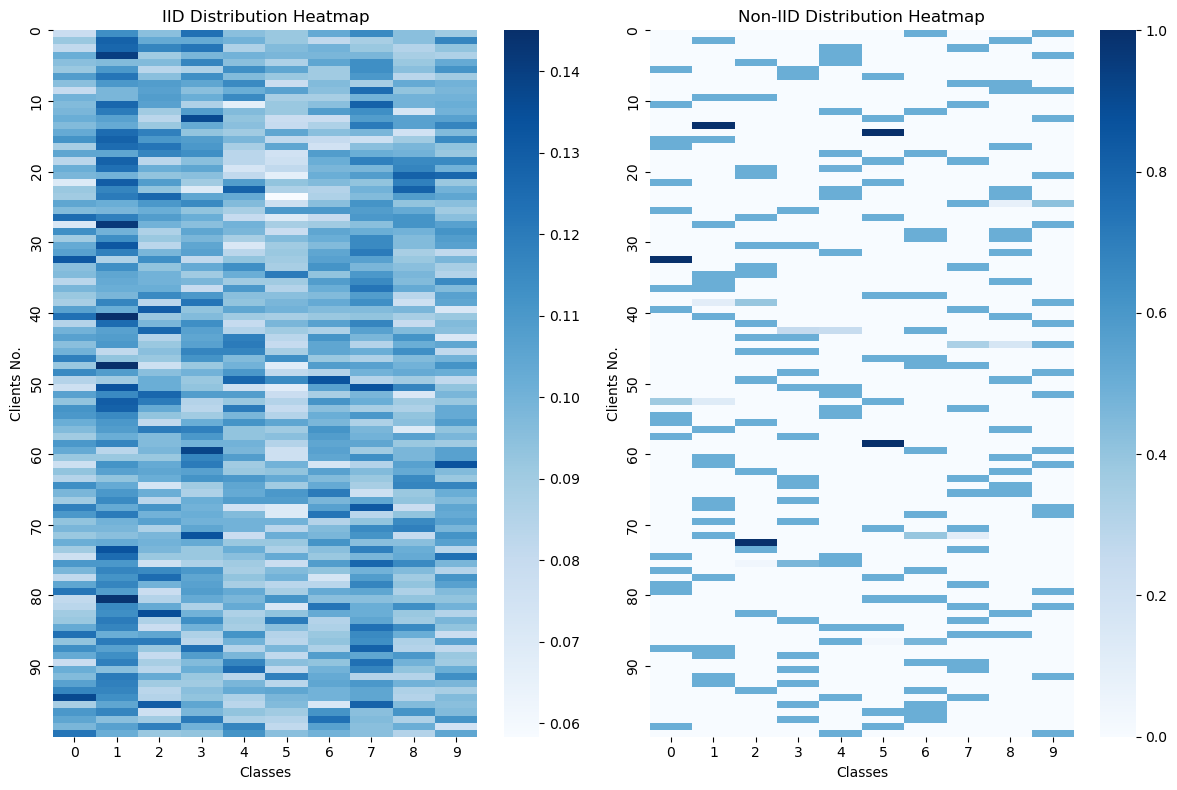

In [2]:
PlotDataDistribution(iid_train_loader, noniid_train_loader)

# 1. Accuracy Trend (VS Rounds)

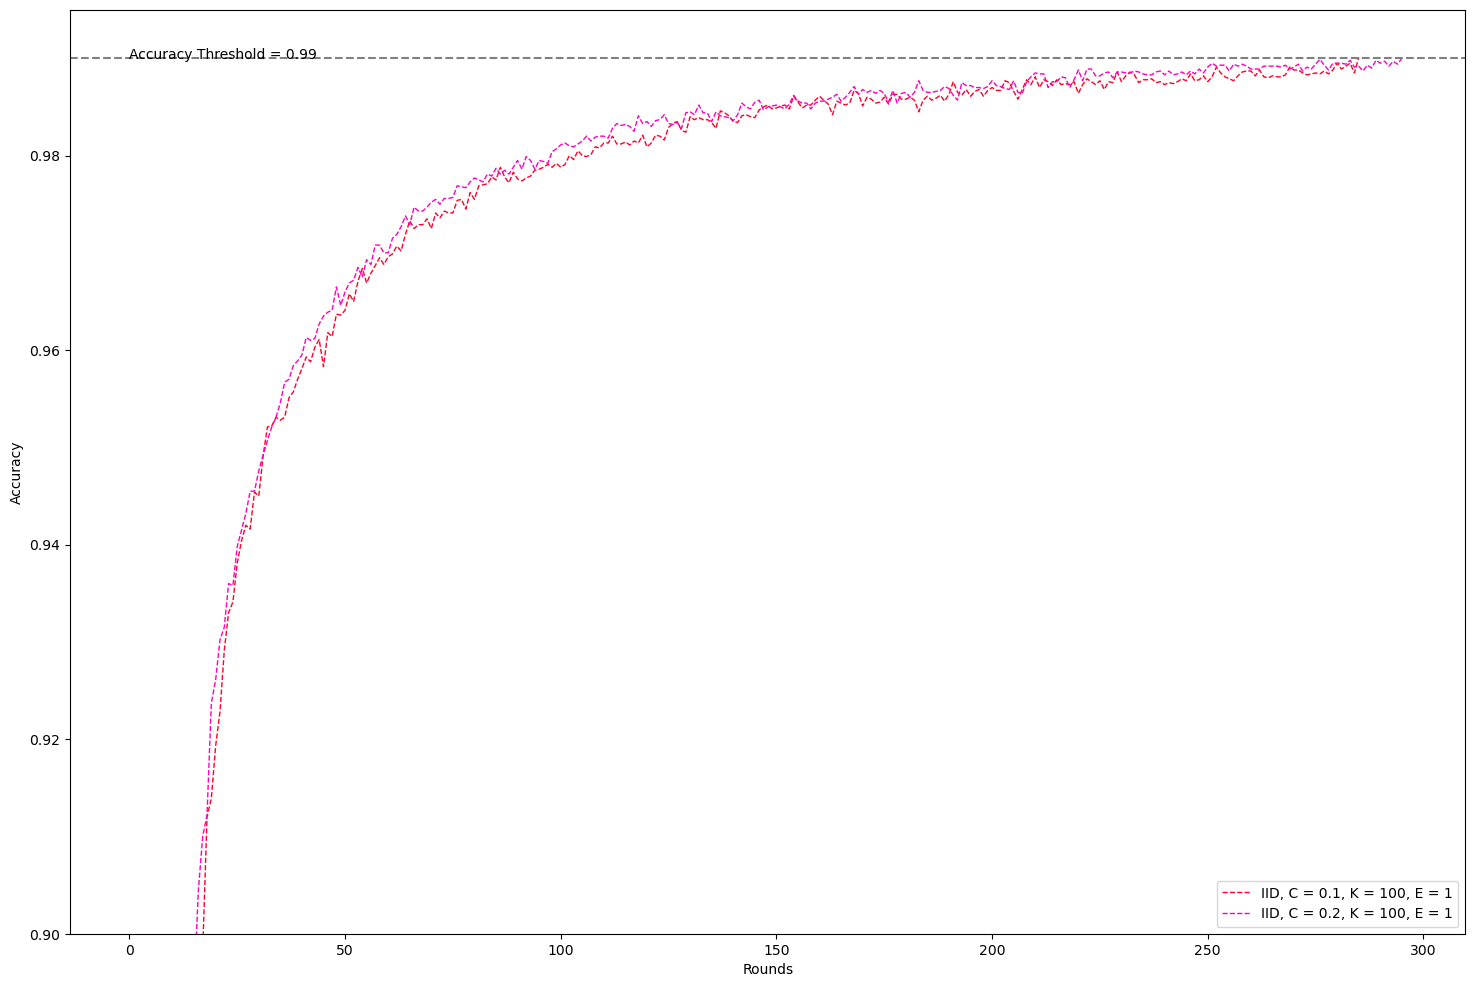

In [3]:
indices1 = list(range(0, 2))
oaccs = [values[9 * i] for i in indices1]
labels = [namelist[i] for i in indices1]

PlotAcc(oaccs, labels = labels, iidno = 2, noniidno = 0)

# 2. Accuracy Trend (VS Epochs)

In [4]:
indices2 = list(range(0, 24))
epochs = [1] * 4 + [10] * 4 + [20] * 4 + [1] * 4 + [10] * 4 + [20] * 4
oaccs = [values[7 * i] for i in indices2]
labels = [namelist[i] for i in indices2]
print(len([values[7 * i] for i in range(0, 4)]))
PlotAcc(oaccs, labels = labels, iidno = 12, noniidno = 12, epochs = epochs)

IndexError: list index out of range

# 3. Entrophy VS Accuracy

285
295
285
295


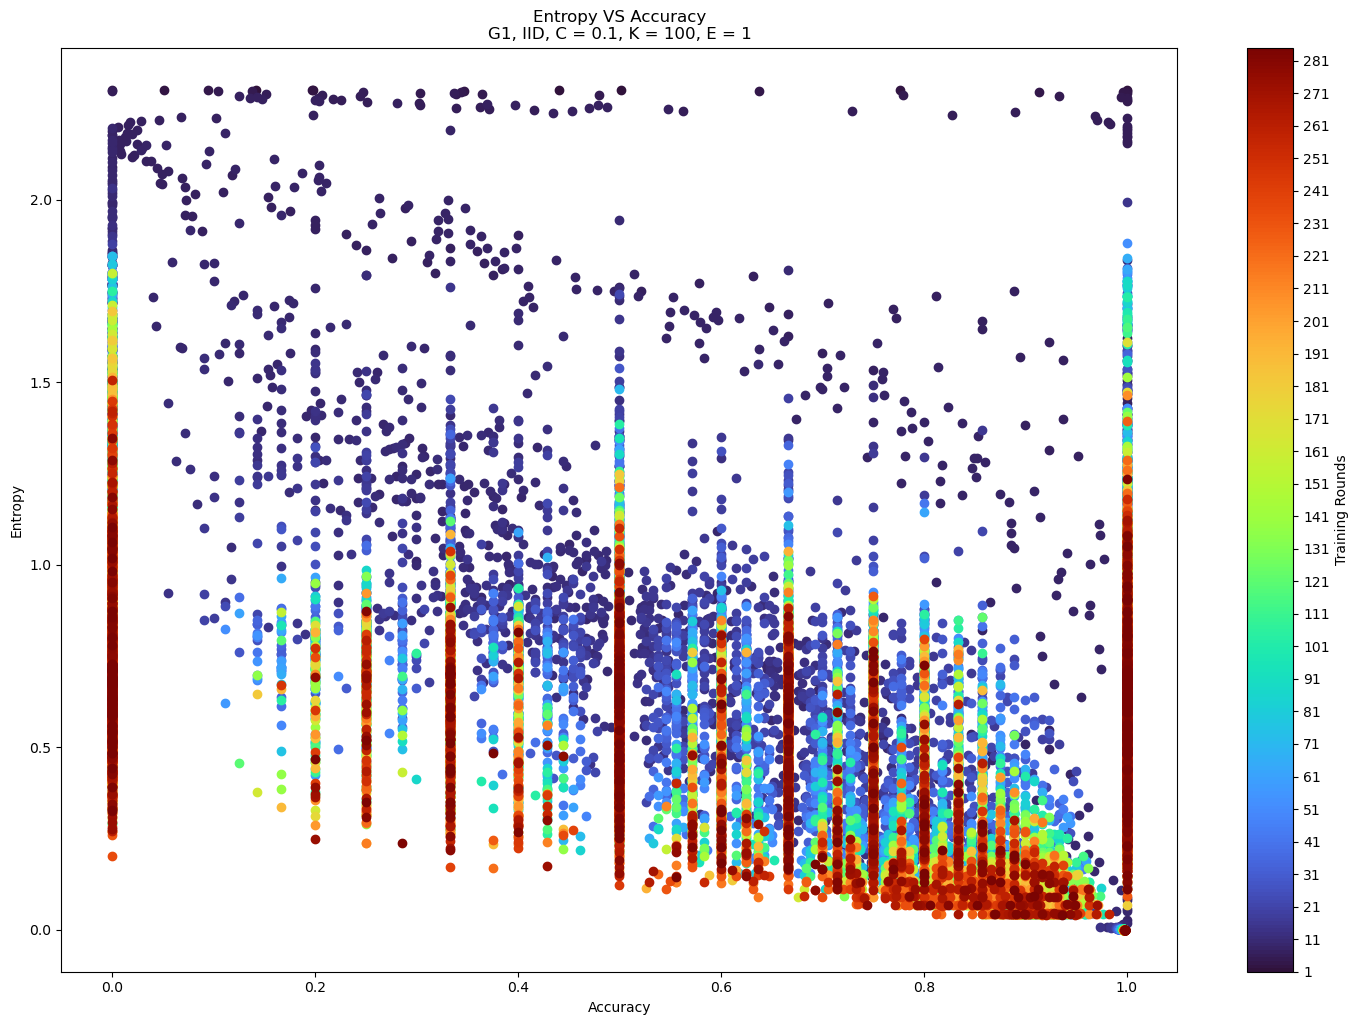

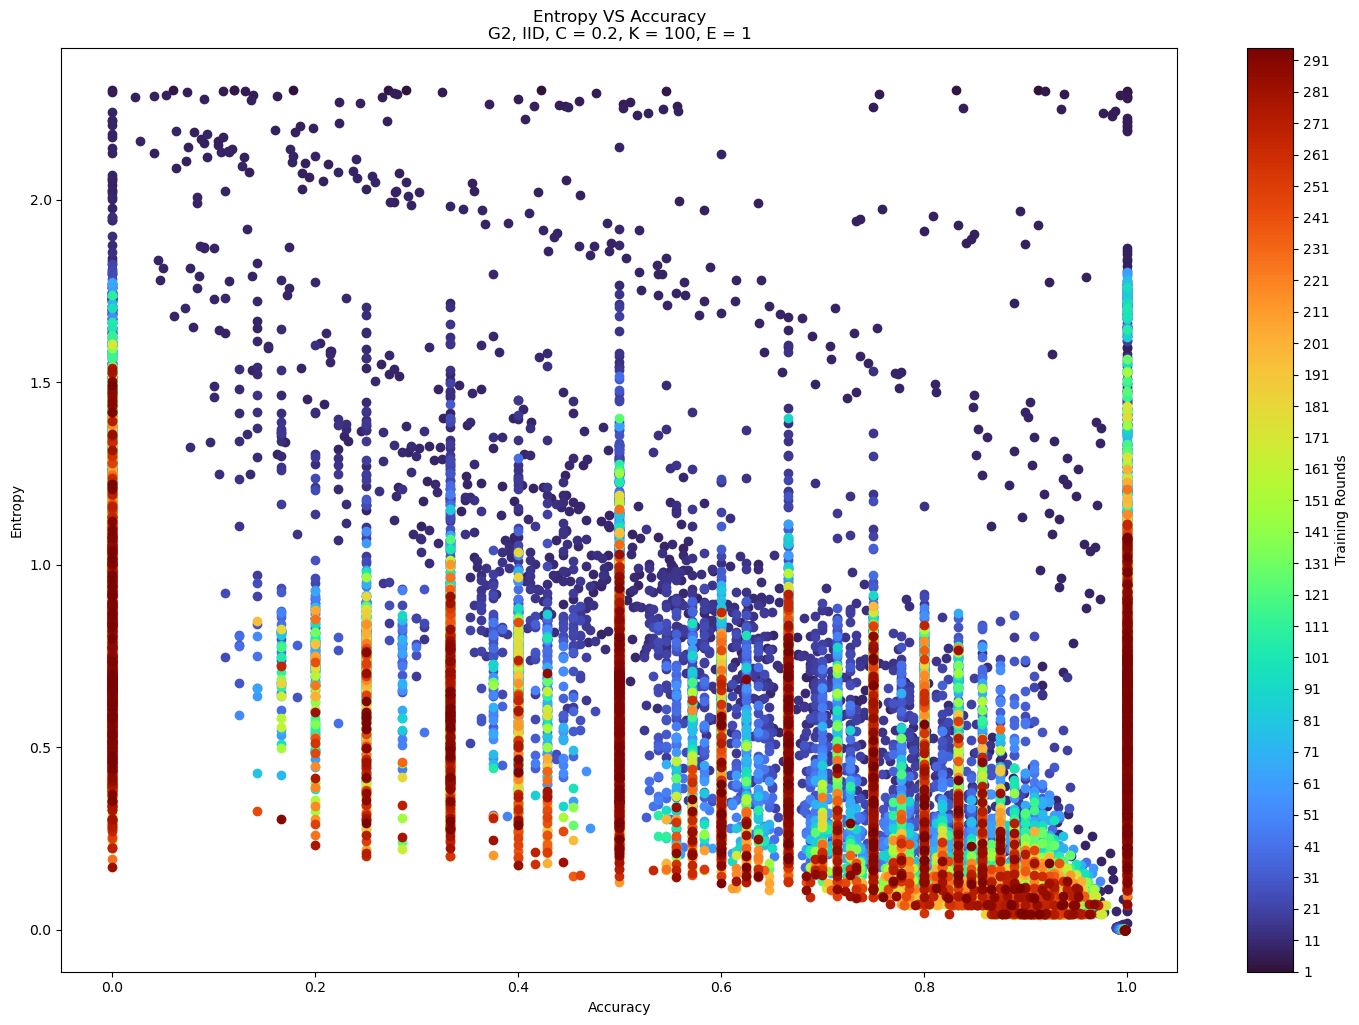

In [5]:
Entros = [values[5 + 9 * i] for i in indices1]
binAccs = [values[1 + 9 * i] for i in indices1]
labels = ["G" + str(i + 1) + ", " + namelist[i] for i in indices1]
print(len(Entros[0]))
print(len(Entros[1]))
print(len(binAccs[0]))
print(len(binAccs[1]))


for i in range(len(Entros)):

    PlotUncertaintyVSAcc(Entros[i], binAccs[i], labels[i])

# 4. Predicted Probability VS Accuracy

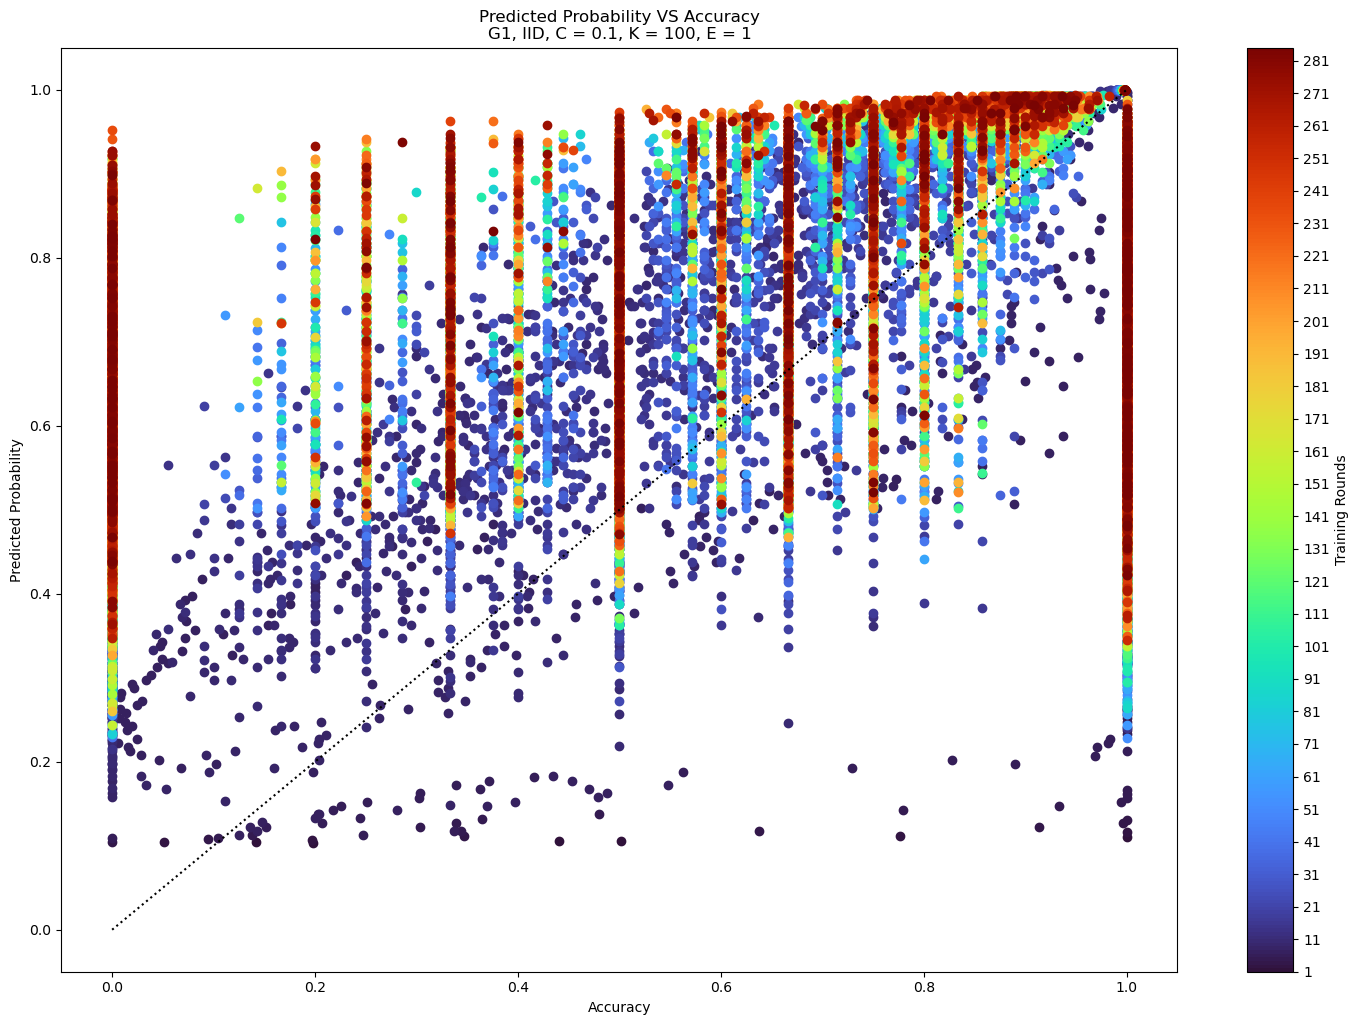

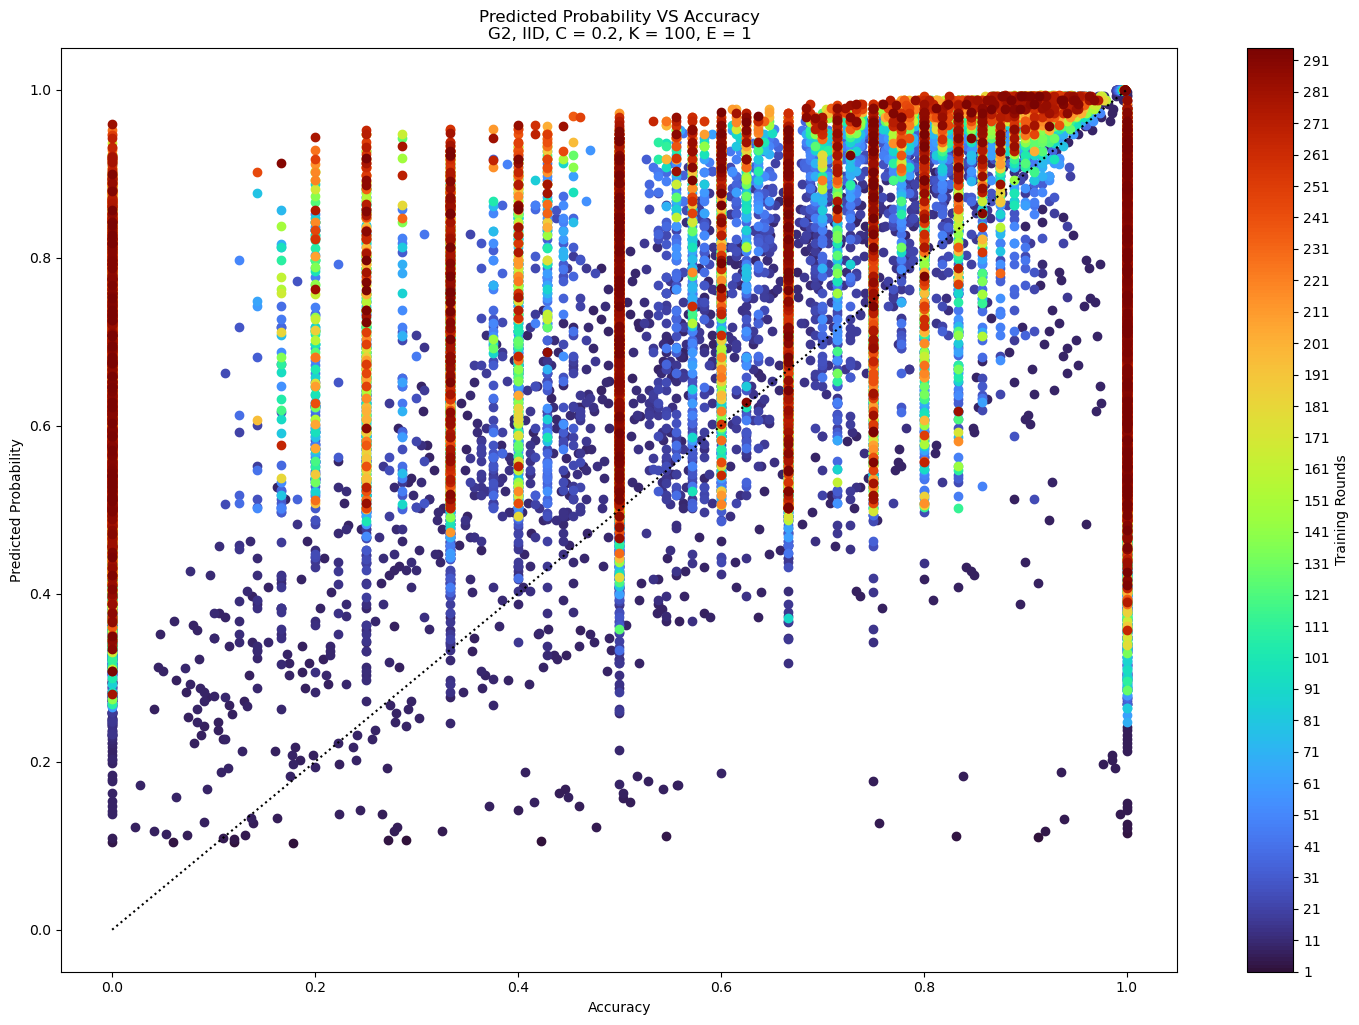

In [6]:
pp = [values[2 + 9 * i] for i in indices1]
binAccs = [values[1 + 9 * i] for i in indices1]
labels = ["G" + str(i + 1) + ", " + namelist[i] for i in indices1]


for i in range(len(pp)):

    PlotPPVSAcc(pp[i], binAccs[i], labels[i])

200
200


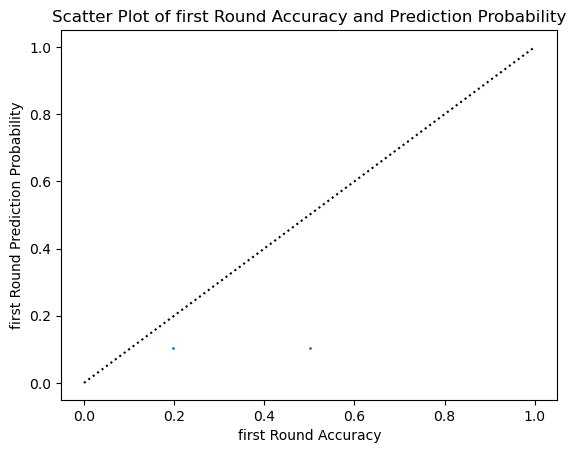

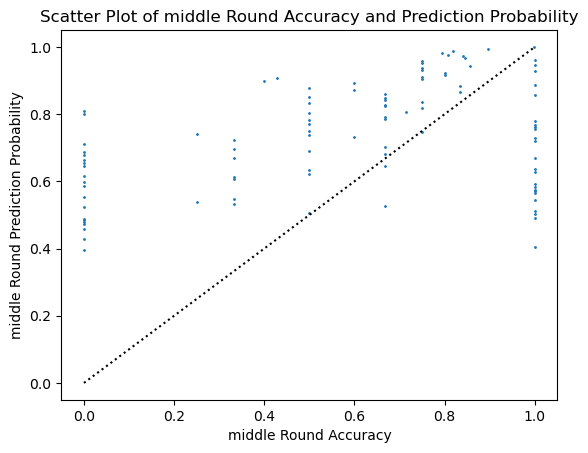

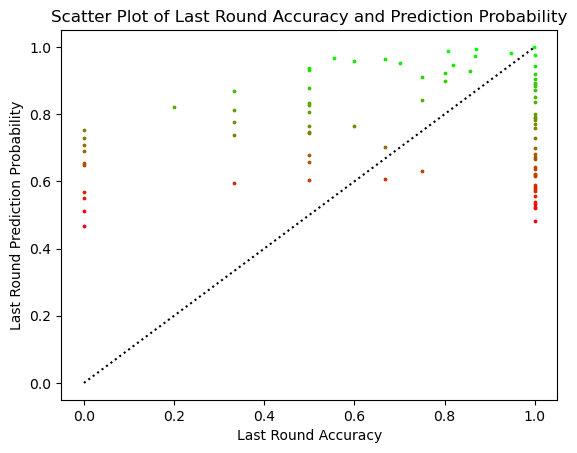

In [12]:
lastRoundpp = values[2]
lastRoundacc = values[1]
cmap = matplotlib.colormaps.get_cmap('brg')

first_acc = lastRoundacc[0]
first_pp = lastRoundpp[0]

middle_acc = lastRoundacc[len(lastRoundacc) // 2]
middle_pp = lastRoundpp[len(lastRoundpp) // 2]

last_acc = lastRoundacc[-1]
last_pp = lastRoundpp[-1]
print(len(last_acc))
print(len(last_pp))


plt.scatter(first_acc, first_pp, s = 1)
plt.plot([0, 1], [0, 1], color='black', linestyle=':')
plt.xlabel('first Round Accuracy')
plt.ylabel('first Round Prediction Probability')
plt.title('Scatter Plot of first Round Accuracy and Prediction Probability')
plt.show()

plt.scatter(middle_acc, middle_pp, s = 1)
plt.plot([0, 1], [0, 1], color='black', linestyle=':')
plt.xlabel('middle Round Accuracy')
plt.ylabel('middle Round Prediction Probability')
plt.title('Scatter Plot of middle Round Accuracy and Prediction Probability')
plt.show()


for i in range(len(last_acc)):
    color = cmap(i / (len(last_acc) - 1))
    plt.scatter(last_acc[i], last_pp[i], color = color, s = 3)
plt.plot([0, 1], [0, 1], color='black', linestyle=':')
plt.xlabel('Last Round Accuracy')
plt.ylabel('Last Round Prediction Probability')
plt.title('Scatter Plot of Last Round Accuracy and Prediction Probability')
plt.show()

# 5. ECE Score VS Overall Accuracy

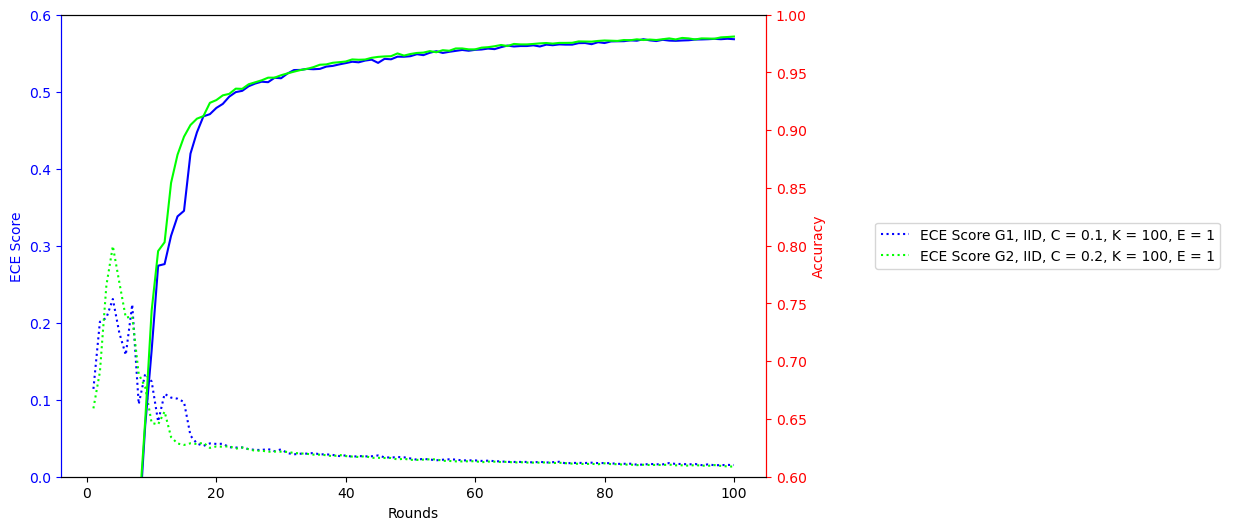

In [8]:
iidindex = [1, 2]
PlotECEVSOAcc(values, iidindex, rounds = 100)

# You can select the group number in namelist to generate new graphs! 